<a href="https://colab.research.google.com/github/SaiArjunSairamje/Python_Libraries-Scaler/blob/main/Pandas_4%20(Dataset%3A%20Pharma_Experiment_Analysis)%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the Libraries & Dataset**

In [1]:
!gdown 173A59xh2mnpmljCCB9bhC4C5eP2IS6qZ

Downloading...
From: https://drive.google.com/uc?id=173A59xh2mnpmljCCB9bhC4C5eP2IS6qZ
To: /content/Pfizer_1.csv
100% 1.51k/1.51k [00:00<00:00, 8.78MB/s]


In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv("Pfizer_1.csv")

In [4]:
data.head()

,Date,Drug_Name,Parameter,1:30:00,2:30:00,3:30:00,4:30:00,5:30:00,6:30:00,7:30:00,8:30:00,9:30:00,10:30:00,11:30:00,12:30:00
0,15-10-2020,diltiazem hydrochloride,Temperature,23.0,22.0,NaN,21.0,21.0,22,23.0,21.0,22.0,20,20.0,21
1,15-10-2020,diltiazem hydrochloride,Pressure,12.0,13.0,NaN,11.0,13.0,14,16.0,16.0,24.0,18,19.0,20
2,15-10-2020,docetaxel injection,Temperature,NaN,17.0,18.0,NaN,17.0,18,NaN,NaN,23.0,23,25.0,25
3,15-10-2020,docetaxel injection,Pressure,NaN,22.0,22.0,NaN,22.0,23,NaN,NaN,27.0,26,29.0,28
4,15-10-2020,ketamine hydrochloride,Temperature,24.0,NaN,NaN,27.0,NaN,26,25.0,24.0,23.0,22,21.0,20


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       18 non-null     object 
 1   Drug_Name  18 non-null     object 
 2   Parameter  18 non-null     object 
 3   1:30:00    16 non-null     float64
 4   2:30:00    16 non-null     float64
 5   3:30:00    12 non-null     float64
 6   4:30:00    14 non-null     float64
 7   5:30:00    16 non-null     float64
 8   6:30:00    18 non-null     int64  
 9   7:30:00    16 non-null     float64
 10  8:30:00    14 non-null     float64
 11  9:30:00    16 non-null     float64
 12  10:30:00   18 non-null     int64  
 13  11:30:00   16 non-null     float64
 14  12:30:00   18 non-null     int64  
dtypes: float64(9), int64(3), object(3)
memory usage: 2.2+ KB


# **What we will learn ???**

> **(1) Convert wide-format to long-format `(i.e. Unpivot Columns to Rows)`**

> **(2) How to handle missing values `(i.e. the NaN values)`**

### **How to convert wide-format data into long-format date (i.e. transpose column to row) ???**

The **pd.melt()** function in **pandas** is used to transform a DataFrame from a **wide format** to a **long format**. It **unpivots the DataFrame**, making it easier to analyze or visualize the data.

Here's the basic syntax of the **pd.melt()** function:

> **`pd.melt(frame, id_vars=None, value_vars=None, var_name=None, value_name='value', ...)`**

**Parameters:**

* **frame**: The DataFrame to be melted.
* **id_vars**: Columns to use as identifier variables (remains as columns in the result).
* **value_vars**: Columns to unpivot. If not specified, all columns not set as **id_vars** will be unpivoted.
* **var_name**: Name to use for the variable column. By default, it is set to **'variable'**.
* **value_name**: Name to use for the value column. By default, it is set to **'value'**.
* Additional parameters for handling data types, sorting, etc.

The pd.melt() function is helpful when you have a DataFrame with multiple columns, and you want to transform it into a long format for further analysis or visualization.








In [6]:
data.head()

,Date,Drug_Name,Parameter,1:30:00,2:30:00,3:30:00,4:30:00,5:30:00,6:30:00,7:30:00,8:30:00,9:30:00,10:30:00,11:30:00,12:30:00
0,15-10-2020,diltiazem hydrochloride,Temperature,23.0,22.0,NaN,21.0,21.0,22,23.0,21.0,22.0,20,20.0,21
1,15-10-2020,diltiazem hydrochloride,Pressure,12.0,13.0,NaN,11.0,13.0,14,16.0,16.0,24.0,18,19.0,20
2,15-10-2020,docetaxel injection,Temperature,NaN,17.0,18.0,NaN,17.0,18,NaN,NaN,23.0,23,25.0,25
3,15-10-2020,docetaxel injection,Pressure,NaN,22.0,22.0,NaN,22.0,23,NaN,NaN,27.0,26,29.0,28
4,15-10-2020,ketamine hydrochloride,Temperature,24.0,NaN,NaN,27.0,NaN,26,25.0,24.0,23.0,22,21.0,20


In [7]:
#id_vars - it's the column's that you don't want to change...

pd.melt(data, id_vars = ["Date", "Parameter", "Drug_Name"])

,Date,Parameter,Drug_Name,variable,value
0,15-10-2020,Temperature,diltiazem hydrochloride,1:30:00,23.0
1,15-10-2020,Pressure,diltiazem hydrochloride,1:30:00,12.0
2,15-10-2020,Temperature,docetaxel injection,1:30:00,NaN
3,15-10-2020,Pressure,docetaxel injection,1:30:00,NaN
4,15-10-2020,Temperature,ketamine hydrochloride,1:30:00,24.0
...,...,...,...,...,...
211,17-10-2020,Pressure,diltiazem hydrochloride,12:30:00,14.0
212,17-10-2020,Temperature,docetaxel injection,12:30:00,23.0
213,17-10-2020,Pressure,docetaxel injection,12:30:00,28.0
214,17-10-2020,Temperature,ketamine hydrochloride,12:30:00,24.0


### **How to change the "variable" & "value" column names as per my choice ???**

In [8]:
pd.melt(data,
        id_vars = ["Date", "Parameter", "Drug_Name"],    #id_vars - it's the column's that you don't want to change
        var_name = "time",     #var_name - it will change the "variable" column name to "time"
        value_name = "reading"     #value_name - it will change the "value" column name to "value_name"
        )

,Date,Parameter,Drug_Name,time,reading
0,15-10-2020,Temperature,diltiazem hydrochloride,1:30:00,23.0
1,15-10-2020,Pressure,diltiazem hydrochloride,1:30:00,12.0
2,15-10-2020,Temperature,docetaxel injection,1:30:00,NaN
3,15-10-2020,Pressure,docetaxel injection,1:30:00,NaN
4,15-10-2020,Temperature,ketamine hydrochloride,1:30:00,24.0
...,...,...,...,...,...
211,17-10-2020,Pressure,diltiazem hydrochloride,12:30:00,14.0
212,17-10-2020,Temperature,docetaxel injection,12:30:00,23.0
213,17-10-2020,Pressure,docetaxel injection,12:30:00,28.0
214,17-10-2020,Temperature,ketamine hydrochloride,12:30:00,24.0


In [9]:
# storing the data into a new variable so that we can retain the original data as it is...

data_melt = pd.melt(data,
        id_vars = ["Date", "Parameter", "Drug_Name"],
        var_name = "time",
        value_name = "reading"
        )

In [10]:
data_melt.head()

,Date,Parameter,Drug_Name,time,reading
0,15-10-2020,Temperature,diltiazem hydrochloride,1:30:00,23.0
1,15-10-2020,Pressure,diltiazem hydrochloride,1:30:00,12.0
2,15-10-2020,Temperature,docetaxel injection,1:30:00,NaN
3,15-10-2020,Pressure,docetaxel injection,1:30:00,NaN
4,15-10-2020,Temperature,ketamine hydrochloride,1:30:00,24.0


### **How to convert back from long-format data into white-format date (i.e. transpose row to column) ???**

The **pivot()** function in pandas is used to reshape a DataFrame from **long format** to **wide format**. It is particularly useful when you want to convert data that has been **melted** or **unpivoted** back to its original structure.

Here's the basic syntax of the **pivot()** function:

> **`DataFrame.pivot(index=None, columns=None, values=None)`**

**Parameters:**

* **index**: The column to be used as the index in the pivoted DataFrame. It can be a column label, column name, or a list of column labels/names. If not specified, the index will be auto-generated.
* **columns**: The column to be used as the columns in the pivoted DataFrame. It can be a column label, column name, or a list of column labels/names.
values: The column to be used as the values in the pivoted DataFrame. It specifies the values to be populated in the new columns based on the index and * **columns**. It can be a column label, column name, or a list of column labels/names.

The **pivot()** function is a convenient way to reshape data from long to wide format in pandas.








In [11]:
#long ==> wide

In [12]:
data_tidy = data_melt.pivot(index = ["Date" , "Drug_Name" , "Parameter"],  #index - it's the column's that you don't want to change
                columns = "time",     #columns - the column that you want to be changed as header
                values = "reading"    #values -
                )

In [13]:
data_tidy

time                                            10:30:00  11:30:00  12:30:00  \
Date       Drug_Name               Parameter                                   
15-10-2020 diltiazem hydrochloride Pressure         18.0      19.0      20.0   
                                   Temperature      20.0      20.0      21.0   
           docetaxel injection     Pressure         26.0      29.0      28.0   
                                   Temperature      23.0      25.0      25.0   
           ketamine hydrochloride  Pressure          9.0       9.0      11.0   
                                   Temperature      22.0      21.0      20.0   
16-10-2020 diltiazem hydrochloride Pressure         24.0       NaN      27.0   
                                   Temperature      40.0       NaN      42.0   
           docetaxel injection     Pressure         28.0      29.0      30.0   
                                   Temperature      56.0      57.0      58.0   
           ketamine hydrochloride  Pressure         16.0      17.0      18.0   
                                   Temperature      13.0      14.0      15.0   
17-10-2020 diltiazem hydrochloride Pressure         11.0      13.0      14.0   
                                   Temperature      14.0      11.0      10.0   
           docetaxel injection     Pressure         28.0      29.0      28.0   
                                   Temperature      21.0      22.0      23.0   
           ketamine hydrochloride  Pressure         13.0      14.0      15.0   
                                   Temperature      22.0      23.0      24.0   

time                                            1:30:00  2:30:00  3:30:00  \
Date       Drug_Name               Parameter                                
15-10-2020 diltiazem hydrochloride Pressure        12.0     13.0      NaN   
                                   Temperature     23.0     22.0      NaN   
           docetaxel injection     Pressure         NaN     22.0     22.0   
                                   Temperature      NaN     17.0     18.0   
           ketamine hydrochloride  Pressure         8.0      NaN      NaN   
                                   Temperature     24.0      NaN      NaN   
16-10-2020 diltiazem hydrochloride Pressure        18.0     19.0     20.0   
                                   Temperature     34.0     35.0     36.0   
           docetaxel injection     Pressure        23.0     24.0      NaN   
                                   Temperature     46.0     47.0      NaN   
           ketamine hydrochloride  Pressure        12.0     12.0     13.0   
                                   Temperature      8.0      9.0     10.0   
17-10-2020 diltiazem hydrochloride Pressure         3.0      4.0      4.0   
                                   Temperature     20.0     19.0     19.0   
           docetaxel injection     Pressure        20.0     22.0     22.0   
                                   Temperature     12.0     13.0     14.0   
           ketamine hydrochloride  Pressure         8.0      9.0     10.0   
                                   Temperature     13.0     14.0     15.0   

time                                            4:30:00  5:30:00  6:30:00  \
Date       Drug_Name               Parameter                                
15-10-2020 diltiazem hydrochloride Pressure        11.0     13.0     14.0   
                                   Temperature     21.0     21.0     22.0   
           docetaxel injection     Pressure         NaN     22.0     23.0   
                                   Temperature      NaN     17.0     18.0   
           ketamine hydrochloride  Pressure         7.0      NaN      9.0   
                                   Temperature     27.0      NaN     26.0   
16-10-2020 diltiazem hydrochloride Pressure        21.0     22.0     23.0   
                                   Temperature     36.0     37.0     38.0   
           docetaxel injection     Pressure        25.0     26.0     27.0   
           

In [14]:
data_tidy = data_tidy.reset_index() #adjusted the "time" subheading as shown above

In [15]:
data_tidy.head()  #NOTE: the "time" column is nothing but the index column

time,Date,Drug_Name,Parameter,10:30:00,11:30:00,12:30:00,1:30:00,2:30:00,3:30:00,4:30:00,5:30:00,6:30:00,7:30:00,8:30:00,9:30:00
0,15-10-2020,diltiazem hydrochloride,Pressure,18.0,19.0,20.0,12.0,13.0,NaN,11.0,13.0,14.0,16.0,16.0,24.0
1,15-10-2020,diltiazem hydrochloride,Temperature,20.0,20.0,21.0,23.0,22.0,NaN,21.0,21.0,22.0,23.0,21.0,22.0
2,15-10-2020,docetaxel injection,Pressure,26.0,29.0,28.0,NaN,22.0,22.0,NaN,22.0,23.0,NaN,NaN,27.0
3,15-10-2020,docetaxel injection,Temperature,23.0,25.0,25.0,NaN,17.0,18.0,NaN,17.0,18.0,NaN,NaN,23.0
4,15-10-2020,ketamine hydrochloride,Pressure,9.0,9.0,11.0,8.0,NaN,NaN,7.0,NaN,9.0,10.0,11.0,10.0


In [16]:
data_tidy.info()  #as you can see, you won't see the "time" index column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       18 non-null     object 
 1   Drug_Name  18 non-null     object 
 2   Parameter  18 non-null     object 
 3   10:30:00   18 non-null     float64
 4   11:30:00   16 non-null     float64
 5   12:30:00   18 non-null     float64
 6   1:30:00    16 non-null     float64
 7   2:30:00    16 non-null     float64
 8   3:30:00    12 non-null     float64
 9   4:30:00    14 non-null     float64
 10  5:30:00    16 non-null     float64
 11  6:30:00    18 non-null     float64
 12  7:30:00    16 non-null     float64
 13  8:30:00    14 non-null     float64
 14  9:30:00    16 non-null     float64
dtypes: float64(12), object(3)
memory usage: 2.2+ KB


In [17]:
#NOTE: Just trying to see if we can remove the "time" index column

data_tidy.columns.name = "None"

In [18]:
data_tidy.head()

None,Date,Drug_Name,Parameter,10:30:00,11:30:00,12:30:00,1:30:00,2:30:00,3:30:00,4:30:00,5:30:00,6:30:00,7:30:00,8:30:00,9:30:00
0,15-10-2020,diltiazem hydrochloride,Pressure,18.0,19.0,20.0,12.0,13.0,NaN,11.0,13.0,14.0,16.0,16.0,24.0
1,15-10-2020,diltiazem hydrochloride,Temperature,20.0,20.0,21.0,23.0,22.0,NaN,21.0,21.0,22.0,23.0,21.0,22.0
2,15-10-2020,docetaxel injection,Pressure,26.0,29.0,28.0,NaN,22.0,22.0,NaN,22.0,23.0,NaN,NaN,27.0
3,15-10-2020,docetaxel injection,Temperature,23.0,25.0,25.0,NaN,17.0,18.0,NaN,17.0,18.0,NaN,NaN,23.0
4,15-10-2020,ketamine hydrochloride,Pressure,9.0,9.0,11.0,8.0,NaN,NaN,7.0,NaN,9.0,10.0,11.0,10.0


### **For a given date, for a given time, and for a perticular drug_name, I want to the have 2 values as it's column namely temperature and pressure.**

**Example of the expected o/p table**

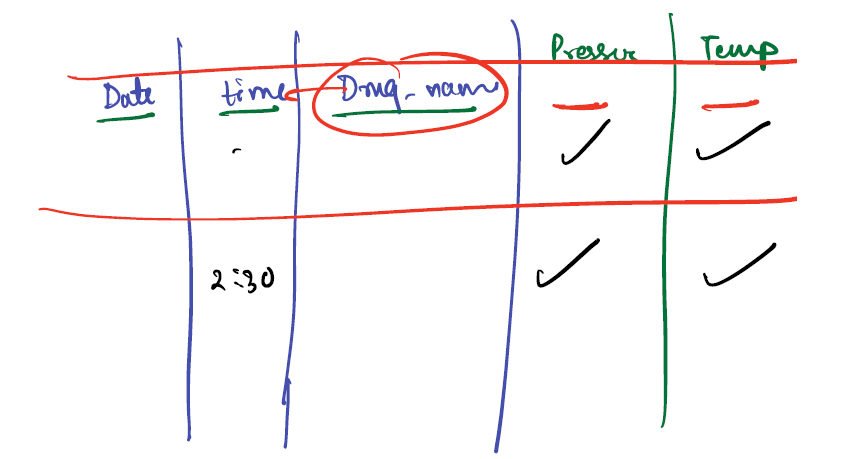


In [19]:
data_melt.head()

,Date,Parameter,Drug_Name,time,reading
0,15-10-2020,Temperature,diltiazem hydrochloride,1:30:00,23.0
1,15-10-2020,Pressure,diltiazem hydrochloride,1:30:00,12.0
2,15-10-2020,Temperature,docetaxel injection,1:30:00,NaN
3,15-10-2020,Pressure,docetaxel injection,1:30:00,NaN
4,15-10-2020,Temperature,ketamine hydrochloride,1:30:00,24.0


In [20]:
data_tidy = data_melt.pivot(
    index = ["Date", "time", "Drug_Name"],
    columns = "Parameter",
    values = "reading"
)

In [21]:
data_tidy.head(15)  #we're getting o/p where at a given time, what drug_name and its pressure and temperature value are...

Parameter                                    Pressure  Temperature
Date       time     Drug_Name                                     
15-10-2020 10:30:00 diltiazem hydrochloride      18.0         20.0
                    docetaxel injection          26.0         23.0
                    ketamine hydrochloride        9.0         22.0
           11:30:00 diltiazem hydrochloride      19.0         20.0
                    docetaxel injection          29.0         25.0
                    ketamine hydrochloride        9.0         21.0
           12:30:00 diltiazem hydrochloride      20.0         21.0
                    docetaxel injection          28.0         25.0
                    ketamine hydrochloride       11.0         20.0
           1:30:00  diltiazem hydrochloride      12.0         23.0
                    docetaxel injection           NaN          NaN
                    ketamine hydrochloride        8.0         24.0
           2:30:00  diltiazem hydrochloride      13.0         22.0
                    docetaxel injection          22.0         17.0
                    ketamine hydrochloride        NaN          NaN

In [22]:
data_tidy.reset_index()  #adjusting the "Parameter" subheading as the index column

Parameter,Date,time,Drug_Name,Pressure,Temperature
0,15-10-2020,10:30:00,diltiazem hydrochloride,18.0,20.0
1,15-10-2020,10:30:00,docetaxel injection,26.0,23.0
2,15-10-2020,10:30:00,ketamine hydrochloride,9.0,22.0
3,15-10-2020,11:30:00,diltiazem hydrochloride,19.0,20.0
4,15-10-2020,11:30:00,docetaxel injection,29.0,25.0
...,...,...,...,...,...
103,17-10-2020,8:30:00,docetaxel injection,26.0,19.0
104,17-10-2020,8:30:00,ketamine hydrochloride,11.0,20.0
105,17-10-2020,9:30:00,diltiazem hydrochloride,9.0,13.0
106,17-10-2020,9:30:00,docetaxel injection,27.0,20.0


# **List Comprehension**

**List comprehension** is a concise and efficient way to create new lists by performing operations on existing lists or other iterables. It allows you to combine loops, conditions, and expressions into a single line of code.

Here's the general syntax of a **list comprehension**:

> **`new_list = [expression for item in iterable if condition]`**

**Components of list comprehension:**

* **expression**: The expression that defines how each item in the iterable is transformed or manipulated to create a new element in the new list.
* **item**: The variable that represents each item in the iterable.
* **iterable**: The existing list, tuple, string, or any other iterable from which you want to create a new list.
* **condition** (optional): An optional condition that filters the items from the iterable based on a specified condition. Only the items that satisfy the condition are included in the new list.

### **Given a list of elements, give me the cube of these elements**

> **`Approach (1):`** Normal **Python code**

> **`Approach (2):`** Using **"List compreshension"**

In [23]:
a = [4, 7, 3]
# b = [16, 49, 9]

In [24]:
# Approach (1): Normal Python code Approach

a = [4, 7, 3]

b = []

for elem in a:
  b.append(elem**2)

print(b)

[16, 49, 9]


In [25]:
# Approach (2): Using List Comprehension Approach

b = [elem**2 for elem in a]

In [26]:
print(b)

[16, 49, 9]


**`Another example:  `**   
**Given a list, provide a new list which stores twice the value of the previous list elements.**

In [27]:
a = [4, 7, 3]

In [28]:
b = [elem*2 for elem in a]

In [29]:
print(b)

[8, 14, 6]


### **"If" statement using "List Comprehension"**

**Given a new list, create a new list where you strore every element except 5 in the same sequence**

In [30]:
a = [4, 7, 5, 9, 3]
#create a new list where you strore every element except 5 in the same sequence
# b = [4, 7, 9, 3]

In [31]:
b = [elem for elem in a if elem != 5]

In [32]:
print(b)

[4, 7, 9, 3]


### **"If-else" statement using "List Comprehension"**

**Given a list, create a new list which stores the number as it is if it is even and stores the double of it, if it is odd**

> **`Approach (1):`** Normal **Python code**

> **`Approach (2):`** Using **"If-else"** stetement in **"List compreshension"**

In [33]:
#if-else

In [34]:
#Given a list, create a new list which stores the number as it is if it is even and stores the double of it, if it is odd

a = [4, 7, 5, 8, 9]
# b = [4, 14, 10, 8, 18]

In [35]:
# Approach (1): Normal Python code

a = [4, 7, 5, 8, 9]

b = []

for elem in a:
  if elem%2 == 0:
    b.append(elem)
  else:
    b.append(2*elem)

print(b)

[4, 14, 10, 8, 18]


In [36]:
# Approach (2): Using "If-else" stetement in "List compreshension"

b = [elem if elem%2 == 0 else elem*2 for elem in a]

In [37]:
print(b)

[4, 14, 10, 8, 18]
